In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load training and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [10]:
# Remove 'Id' column as it's not useful for model training
train_data = train_data.drop('Id', axis=1)
test_data_new = test_data.drop('Id', axis=1)

# Save test IDs for final output
test_Ids = test_data['Id']

# Split features and target
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

In [11]:
# Combine training and test features for uniform preprocessing
combined = pd.concat([X_train, test_data_new], keys=["train", "test"])

# Separate numeric and categorical columns
numeric_features = combined.select_dtypes(include=[np.number]).columns
categorical_features = combined.select_dtypes(include=["object"]).columns

# Create imputers for missing values
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = SimpleImputer(strategy='constant', fill_value='Missing')

# Apply imputers to numeric and categorical columns
combined[numeric_features] = numeric_transformer.fit_transform(combined[numeric_features])
combined[categorical_features] = categorical_transformer.fit_transform(combined[categorical_features])

# Create a column transformer to apply OneHotEncoding to categorical columns and keep numeric ones at it is
preprocessor = ColumnTransformer(
    transformers=[
        ('Model', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'   # Keep numeric features unchang
)

# Apply the preprocessing (encoding)
combined_encoded = preprocessor.fit_transform(combined)

# Split back into train and test sets
train_rows = X_train.shape[0]
X_train_encoded = combined_encoded[:train_rows, :]
X_test_encoded = combined_encoded[train_rows:, :]

In [12]:
# Initialize and train a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train_encoded, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [13]:
# Predict on test data
predictions = regressor.predict(X_test_encoded)

# Save the predictions to a CSV file in the required format
output = pd.DataFrame({'Id': test_Ids, 'SalePrice': predictions})
output.to_csv('house_price_predictions.csv', index=False)

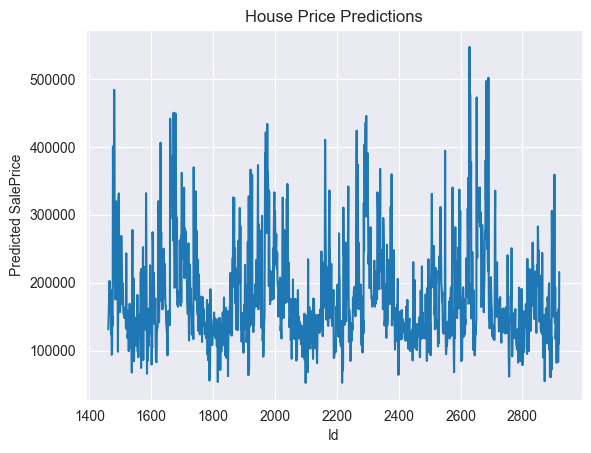

In [16]:
new_data = pd.read_csv('house_price_predictions.csv')
# Plot Id vs SalePrice
plt.plot(new_data['Id'], new_data['SalePrice'])
plt.xlabel('Id')
plt.ylabel('Predicted SalePrice')
plt.title('House Price Predictions')
plt.grid(True)
plt.show()